# This notebook produces 3D magentic plots with interpolated points, and use them to evalute the field property around the SCM plate in detail

In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import scipy


In [17]:
df1 = pd.read_csv('Mapping_0809_RUN1.csv')
df2 = pd.read_csv('Mapping_0809_RUN2.csv')
df3 = pd.read_csv('Mapping_0809_RUN3.csv')
df4 = pd.read_csv('Mapping_0809_RUN4.csv')

df_all0 = df1.append(df2)
df_all1  = df_all0.append(df3)
df_all  = df_all1.append(df4)

df_all['x'] = - df_all.u + 10.25
df_all['y'] = -df_all.w
df_all['z'] = df_all.v -1.25
df_all['B_x'] = -df_all['B_u']
df_all['B_y'] = -df_all['B_w']
df_all['B_z'] = df_all['B_v']

In [400]:
df_all.to_csv('data_csv/rawdata_all.csv')
df_plat0 = df_all[df_all.z>0]
df_plat0.to_csv('data_csv/rawdata_all_z_above_platform.csv')

In [18]:
df_all[:2]

cycle    time_start      time_end      u       v       w       B_u  \
0      0  1.565393e+09  1.565393e+09 -87.95 -146.13 -192.75  0.501304   
1      1  1.565393e+09  1.565393e+09 -87.95 -106.13 -192.75  0.594004   

       dB_u       B_v      dB_v       B_w      dB_w     x       y       z  \
0  0.000271  1.221652  0.000049  1.236878  0.000113  98.2  192.75 -147.38   
1  0.000063  1.255494  0.000049  1.038404  0.000093  98.2  192.75 -107.38   

        B_x       B_y       B_z  
0 -0.501304 -1.236878  1.221652  
1 -0.594004 -1.038404  1.255494

In [4]:
u_max = np.max(df_all.u)
v_max = np.max(df_all.v)
w_max = np.max(df_all.w)
u_min = np.min(df_all.u)
v_min = np.min(df_all.v)
w_min = np.min(df_all.w)

x_max = np.max(df_all.x)
z_max = np.max(df_all.z)
y_max = np.max(df_all.y)
x_min = np.min(df_all.x)
z_min = np.min(df_all.z)
y_min = np.min(df_all.y)

In [23]:
v_floors = df_all1.v.unique()

v_all = df_all.v.unique()
w_all = df_all.w.unique()
u_all = df_all.u.unique()
print len(v_all)
print len(u_all)

print len(w_all)
# z_floors = df_all.z.unique()

z_all = df_all.z.unique()
y_all = df_all.y.unique()
x_all = df_all.x.unique()
print len(z_all)
print len(x_all)
print len(y_all)

11
10
14
11
10
14


#### 2D interploation near the floor


#### Horizontal cuts


In [95]:
# v_cut = v_floors[6]
idx_cut = 10
v_cut=v_all[idx_cut]

df_all_sub = df_all[df_all.v==v_cut]
print df_all_sub.index.size
u_min, u_max= np.min(df_all_sub.u), np.max(df_all_sub.u)
w_min, w_max= np.min(df_all_sub.w), np.max(df_all_sub.w)
NL = 50 # default os 50

u_dense, w_dense = np.meshgrid(np.linspace(u_min, u_max, NL), np.linspace(w_min,w_max, NL))


import scipy.interpolate as interp
Bu_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bu_dense = Bu_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bv_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_v, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bv_dense = Bv_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bw_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_w, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bw_dense = Bw_rbf(u_dense, w_dense)  # not really a function, but a callable class instance



IndexError: index 11 is out of bounds for axis 0 with size 11

In [93]:
# df_all_sub[['u','w', 'B_u','B_v','B_w']]

<IPython.core.display.Javascript object>


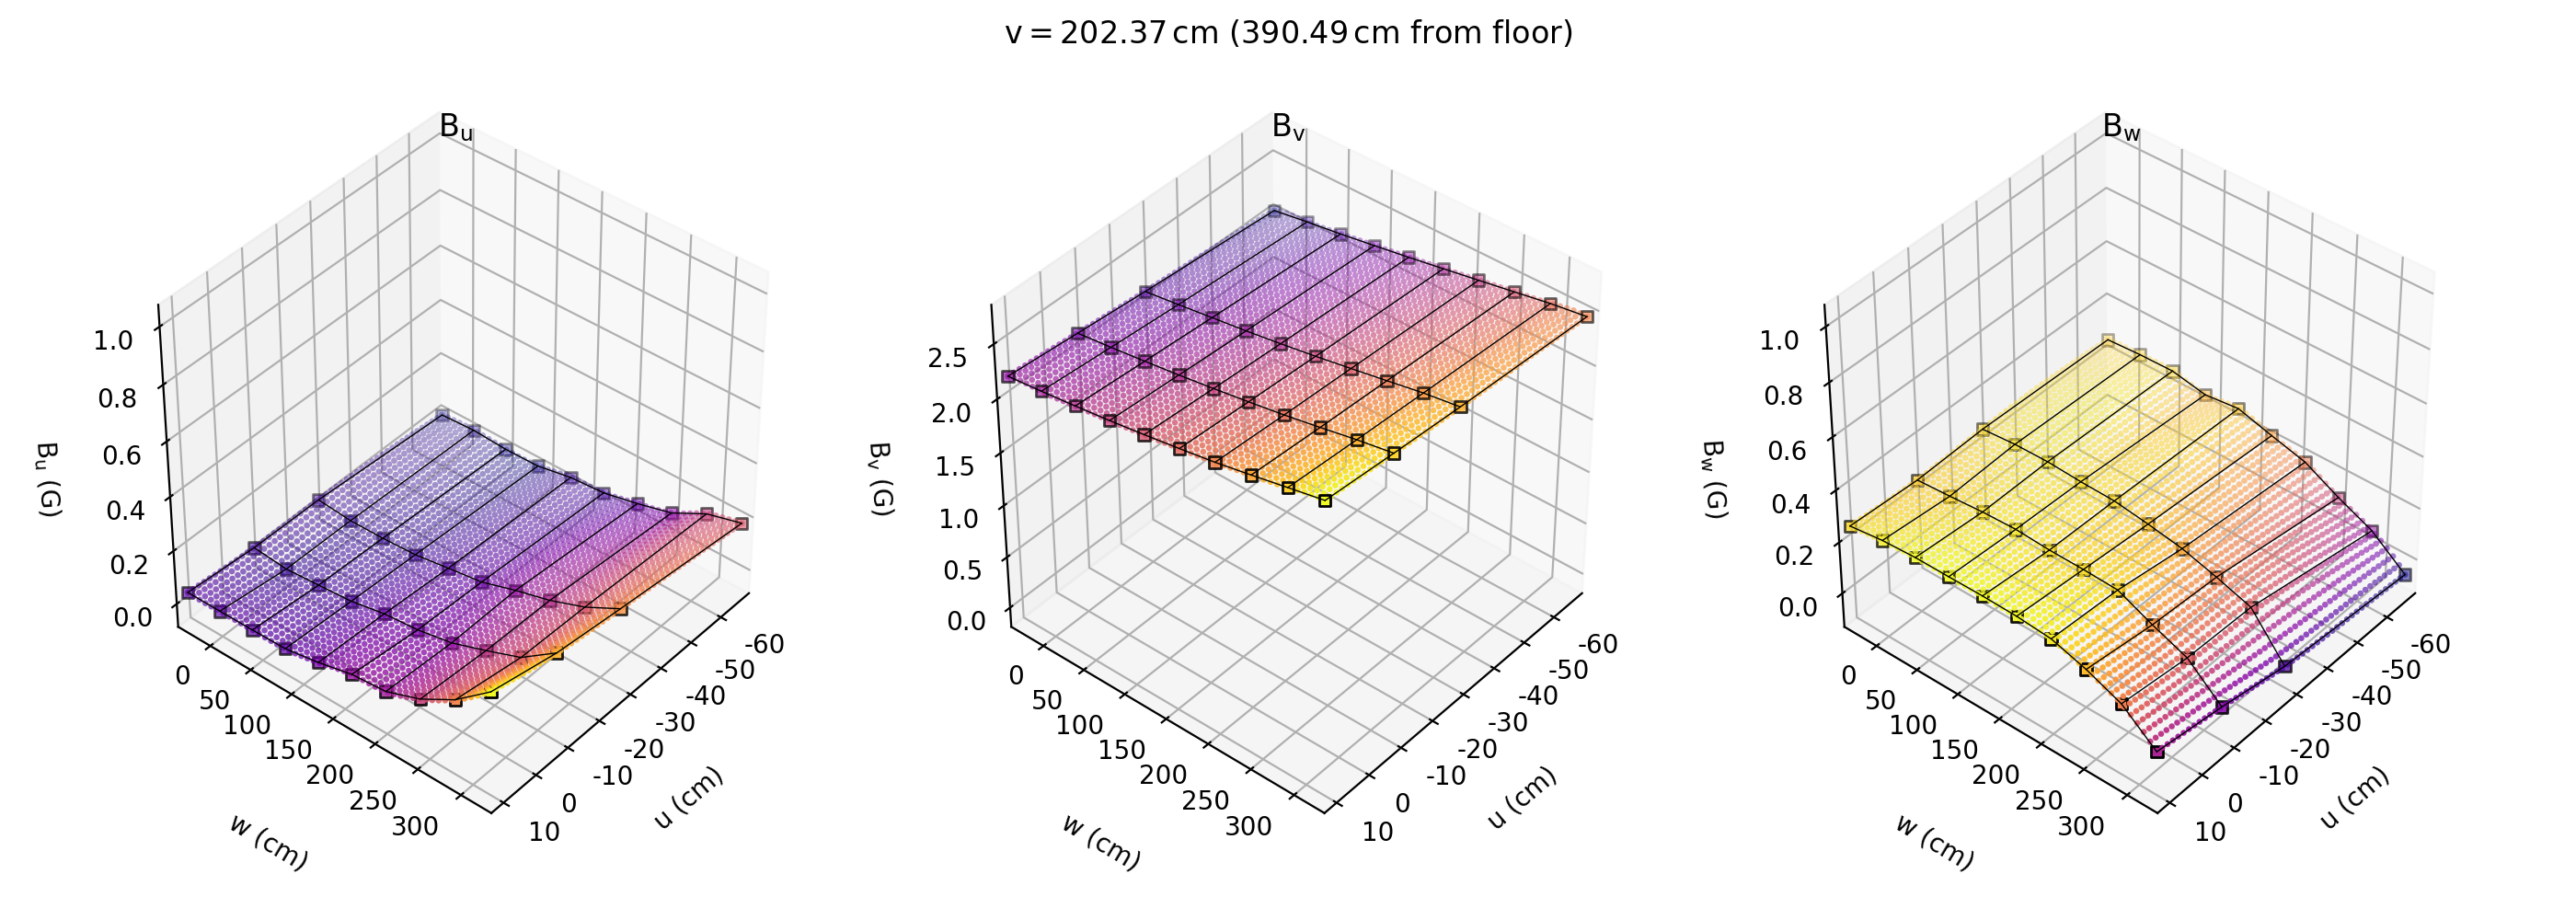

In [94]:
fig1 = plt.figure(facecolor='white', figsize=(14,5))

ax1 = fig1.add_subplot(131, projection='3d')
ax2 = fig1.add_subplot(132, projection='3d')
ax3 = fig1.add_subplot(133, projection='3d')


# ax1.tick_params(axis='x', rotation=-15, labelsize=10)
# ax1.tick_params(axis='y', rotation=-25, labelsize=10)
# ax1.tick_params(axis='y', rotation=-30, labelsize=11)
# ax1.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax1, ax2, ax3]:
    axi.view_init(elev=40., azim=40)
    
    axi.set_xlim3d(u_min,u_max)
    axi.set_ylim3d(w_min,w_max)    
#    prarmeters for elev=40., azim=40)
    axi.set_xticklabels(ax1.get_xticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='left')
    axi.set_yticklabels(ax1.get_yticks(), 
                    verticalalignment='baseline',
                    horizontalalignment='right')    
#     axi.set_xticklabels(ax1.get_xticks(), rotation=50,
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax1.get_yticks(), 
#                     verticalalignment='baseline',rotation=-25,
#                     horizontalalignment='left')

    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
                                  

    axi.set_xlabel('$\mathsf{u}$ (cm)', rotation=7, labelpad=10)
    axi.set_ylabel('$\mathsf{w}$ (cm)',  labelpad=15)
    
for wi in w_all:
    ax1.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_u, '-', c='black', lw=.5)
    ax2.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_v, '-', c='black', lw=.5)
    ax3.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').w==wi].B_w, '-', c='black', lw=.5)
    
#     ax1.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_u, '-', c='black', lw=.5)
#     ax2.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_v, '-', c='black', lw=.5)
#     ax3.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').w==wi].B_w, '-', c='black', lw=.5)
for ui in u_all:
#     ax1.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_u, '-', c='black', lw=.5)
#     ax2.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_v, '-', c='black', lw=.5)
#     ax3.plot(df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].u,df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].w, df_all_sub.sort_values('u')[df_all_sub.sort_values('u').u==ui].B_w, '-', c='black', lw=.5)
    ax1.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_u, '-', c='black', lw=.5)
    ax2.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_v, '-', c='black', lw=.5)
    ax3.plot(df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].u,df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].w, df_all_sub.sort_values('w')[df_all_sub.sort_values('w').u==ui].B_w, '-', c='black', lw=.5)


# sc1 = ax1.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)
sc1_int = ax1.scatter(u_dense, w_dense, Bu_dense,  c=np.concatenate(Bu_dense), marker='.', lw=.1, cmap=cm.plasma)
sc2_int = ax2.scatter(u_dense, w_dense, Bv_dense,  c=np.concatenate(Bv_dense), marker='.', lw=.1, cmap=cm.plasma)
sc3_int = ax3.scatter(u_dense, w_dense, Bw_dense,  c=np.concatenate(Bw_dense), marker='.', lw=.1, cmap=cm.plasma)

sc1 = ax1.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_u,c=df_all_sub.B_u, edgecolor='black',marker='s', cmap=cm.plasma)
sc2 = ax2.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_v,c=df_all_sub.B_v, edgecolor='black',marker='s', cmap=cm.plasma)
sc3 = ax3.scatter(df_all_sub.u, df_all_sub.w, df_all_sub.B_w,c=df_all_sub.B_w, edgecolor='black',marker='s', cmap=cm.plasma)


ax1.set_title('$\mathsf{B_u}$') 
ax1.set_zlabel('$\mathsf{B_u}$ (G)', rotation=180, labelpad=10)


ax2.set_zlabel('$\mathsf{B_v}$ (G)', rotation=180, labelpad=10)
ax2.set_title('$\mathsf{B_v}$')

ax3.set_zlabel('$\mathsf{B_w}$ (G)', rotation=180, labelpad=10)
ax3.set_title('$\mathsf{B_w}$')

fig1.suptitle('$\mathsf{v=%.2f\,cm\,\, (%.2f\,cm\,\,from\,\,floor  )}$'%(v_cut,v_cut+188.12))

fig1.tight_layout(pad=3,rect=[0, 0, 1, 0.99])

fig1.savefig('plots_0809_int_v/Mapping0809_v_id_%02d%.2f.png' %(idx_cut,v_cut))

### Vertical cuts

In [80]:
# z_cut = z_floors[6]
idx_ucut = 2
x_cut=x_all[idx_ucut]

df_all_sub = df_all[df_all.x==x_cut]
print df_all_sub.index.size


z_min, z_max= np.min(df_all_sub.z), np.max(df_all_sub.z)
y_min, y_max= np.min(df_all_sub.y), np.max(df_all_sub.y)
NL = 50 # default os 50

z_dense, y_dense = np.meshgrid(np.linspace(z_min, z_max, NL), np.linspace(y_min,y_max, NL))


import scipy.interpolate as interp
# Bx_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bx_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation

Bx_dense = Bx_rbf(z_dense, y_dense)  # not really a function, but a callable class instance


Bz_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bz_dense = Bz_rbf(z_dense, y_dense)  # not really a function, but a callable class instance

By_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
By_dense = By_rbf(z_dense, y_dense)  # not really a function, but a callable class instance



109


<IPython.core.display.Javascript object>


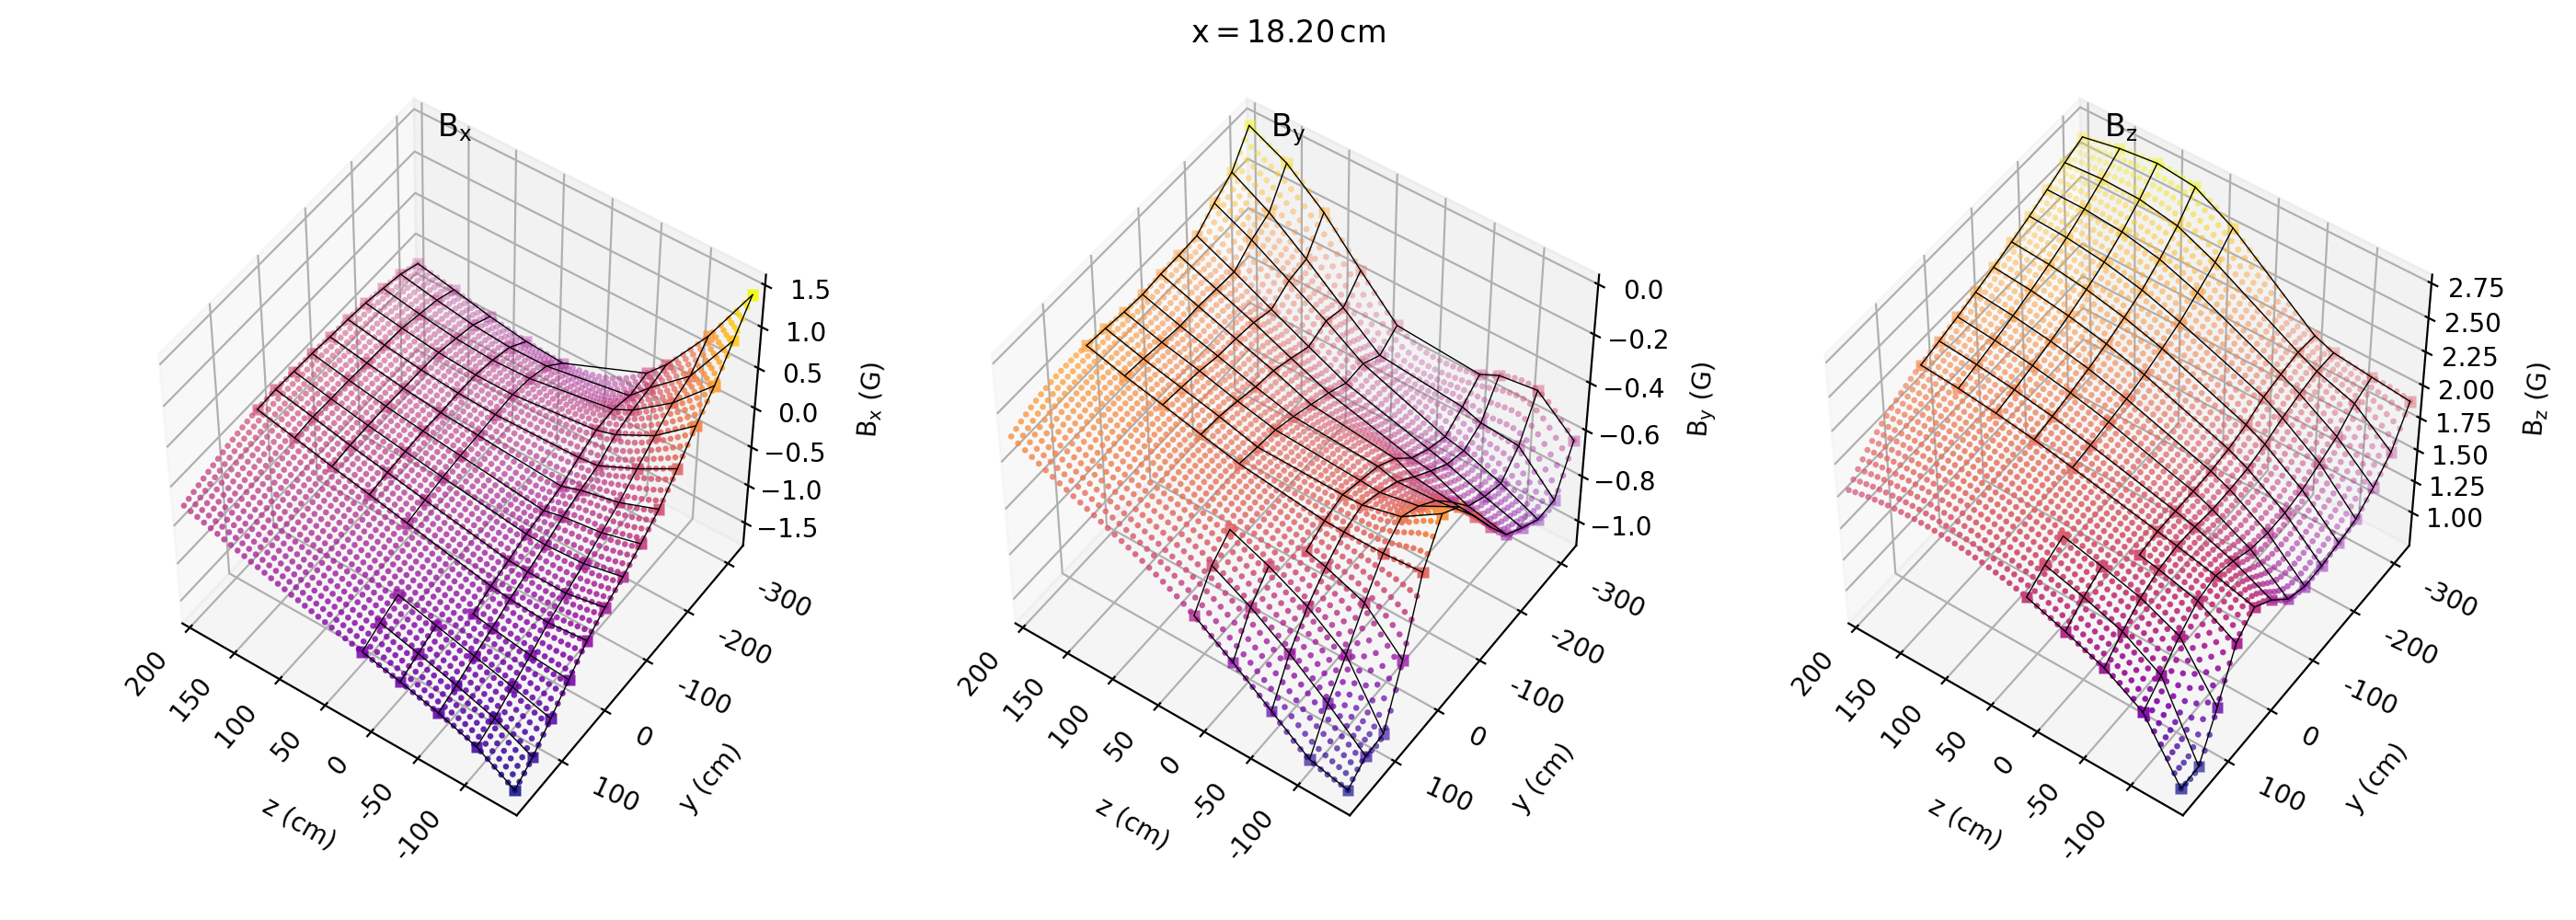

In [81]:
fig2 = plt.figure(facecolor='white', figsize=(14,5))

ax4 = fig2.add_subplot(131, projection='3d')
ax5 = fig2.add_subplot(132, projection='3d')
ax6 = fig2.add_subplot(133, projection='3d')


# ax4.tick_params(axis='x', rotation=-15, labelsize=10)
# ax4.tick_params(axis='y', rotation=-25, labelsize=10)
# ax4.tick_params(axis='y', rotation=-30, labelsize=11)
# ax4.set_ylim3d(np.min(df1_sub.z)-15,np.max(df1_sub.z)+5)



for axi in [ax4, ax5, ax6]:
    axi.view_init(elev=50., azim=125)
    
    axi.set_xlim3d(z_min,z_max)
    axi.set_ylim3d(y_min,y_max)    
# #    prarmeters for elev=40., azim=40)
#     axi.set_xticklabels(ax4.get_xticks(), 
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax4.get_yticks(), 
#                     verticalalignment='baseline',
#                     horizontalalignment='right')    
#    prarmeters for elev=-148., azim=30)
    axi.set_xticklabels(ax4.get_xticks(),  rotation=50,
                    verticalalignment='baseline',
                    horizontalalignment='right')
    axi.set_yticklabels(ax4.get_yticks(),  rotation=-25,
                    verticalalignment='baseline',
                    horizontalalignment='left')    
#     axi.set_xticklabels(ax4.get_xticks(), rotation=50,
#                     verticalalignment='baseline',
#                     horizontalalignment='left')
#     axi.set_yticklabels(ax4.get_yticks(), 
#                     verticalalignment='baseline',rotation=-25,
#                     horizontalalignment='left')

    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
                                  

    axi.set_xlabel('$\mathsf{z}$ (cm)', rotation=7, labelpad=10)
    axi.set_ylabel('$\mathsf{y}$ (cm)',  labelpad=15)
    
for yi in y_all:
    ax4.plot(df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].z,df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].y, df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].B_x, '-', c='black', lw=.5)
    ax6.plot(df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].z,df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].y, df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].B_z, '-', c='black', lw=.5)
    ax5.plot(df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].z,df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].y, df_all_sub.sort_values('z')[df_all_sub.sort_values('z').y==yi].B_y, '-', c='black', lw=.5)
    
for zi in z_all:
    ax4.plot(df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].z,df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].y, df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].B_x, '-', c='black', lw=.5)
    ax6.plot(df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].z,df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].y, df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].B_z, '-', c='black', lw=.5)
    ax5.plot(df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].z,df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].y, df_all_sub.sort_values('y')[df_all_sub.sort_values('y').z==zi].B_y, '-', c='black', lw=.5)


# sc4 = ax4.scatter(df1_sub.y, df1_sub.z, df1_sub.B_x,c=df1_sub.B_x, edgecolor='',marker='o', cmap=cm.plasma)

sc4_int = ax4.scatter(z_dense, y_dense, Bx_dense,  c=np.concatenate(Bx_dense), marker='.', lw=.1, cmap=cm.plasma)
sc5_int = ax6.scatter(z_dense, y_dense, Bz_dense,  c=np.concatenate(Bz_dense), marker='.', lw=.1, cmap=cm.plasma)
sc6_int = ax5.scatter(z_dense, y_dense, By_dense,  c=np.concatenate(By_dense), marker='.', lw=.1, cmap=cm.plasma)

sc4 = ax4.scatter(df_all_sub.z, df_all_sub.y, df_all_sub.B_x,c=df_all_sub.B_x, edgecolor='',marker='s', cmap=cm.plasma)
sc5 = ax6.scatter(df_all_sub.z, df_all_sub.y, df_all_sub.B_z,c=df_all_sub.B_z, edgecolor='',marker='s', cmap=cm.plasma)
sc6 = ax5.scatter(df_all_sub.z, df_all_sub.y, df_all_sub.B_y,c=df_all_sub.B_y, edgecolor='',marker='s', cmap=cm.plasma)


ax4.set_title('$\mathsf{B_x}$') 
ax4.set_zlabel('$\mathsf{B_x}$ (G)', rotation=180, labelpad=10)

ax6.set_zlabel('$\mathsf{B_z}$ (G)', rotation=180, labelpad=10)
ax6.set_title('$\mathsf{B_z}$')

ax5.set_zlabel('$\mathsf{B_y}$ (G)', rotation=180, labelpad=10)
ax5.set_title('$\mathsf{B_y}$')

fig2.suptitle('$\mathsf{x=%.2f\,cm}$'%(x_cut))

fig2.tight_layout(pad=3,rect=[0, 0, 1, 0.99])# plt.colorbar(sc, ax=ax4)


fig2.savefig('plots_0809_int_x/Mapping0809_x_id_%02d%.2f.png' %(idx_ucut,x_cut))

#### 2D color plots: z = 121/41

In [90]:
print x_all
print y_all
print z_all
print 136.5 - 83.7

[  98.2   58.2   18.2  -21.8  -61.8 -101.8 -141.8   -1.8   38.2   78.2]
[ 192.75  152.75  112.75   72.75   32.75   -7.25  -47.25  -87.25 -127.25
 -167.25 -207.25 -247.25 -287.25 -327.25]
[-147.38 -107.38  -67.38  -27.38   12.62  -47.38   41.12   81.12  121.12
  161.12  201.12]
52.8


In [124]:
df_plat = df_all[df_all.z > 0]
x_tick = np.sort(np.append(df_plat.x.unique(), np.array([0,-41.8])))
z_tick = np.sort(np.append(df_plat.z.unique(), np.array([52.8, 136.5])))
y_tick = np.sort(df_plat.y.unique())
x_grid, y_grid, z_grid  = np.meshgrid(x_tick, y_tick, z_tick)



In [176]:
print x_tick
print y_tick
print z_tick

Bx_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation

Bx_grid = Bx_rbf(z_grid, y_grid)  # not really a function, but a callable class instance


Bx_rbf = interp.Rbf(df_plat.x, df_plat.y, df_plat.z, df_plat.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bx_grid = Bx_rbf(x_grid, y_grid, z_grid)  # not really a function, but a callable class instance

By_rbf = interp.Rbf(df_plat.x, df_plat.y, df_plat.z, df_plat.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
By_grid = By_rbf(x_grid, y_grid, z_grid)  # not really a function, but a callable class instance

Bz_rbf = interp.Rbf(df_plat.x, df_plat.y, df_plat.z, df_plat.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bz_grid = Bz_rbf(x_grid, y_grid, z_grid)  # not really a function, but a callable class instance

df_grid= pd.DataFrame([])
df_grid['x'] = np.concatenate(np.concatenate(x_grid))
df_grid['y'] = np.concatenate(np.concatenate(y_grid))
df_grid['z'] = np.concatenate(np.concatenate(z_grid))
df_grid['B_x'] = np.concatenate(np.concatenate(Bx_grid))
df_grid['B_y'] = np.concatenate(np.concatenate(By_grid))
df_grid['B_z'] = np.concatenate(np.concatenate(Bz_grid))



[-141.8 -101.8  -61.8  -41.8  -21.8   -1.8    0.    18.2   38.2   58.2
   78.2   98.2]
[-327.25 -287.25 -247.25 -207.25 -167.25 -127.25  -87.25  -47.25   -7.25
   32.75   72.75  112.75  152.75  192.75]
[ 12.62  41.12  52.8   81.12 121.12 136.5  161.12 201.12]


In [402]:
df_grid.to_csv('data_csv/interpolated_z_above_platform.csv')

#### z = 136.5 cm


In [418]:
# z_height = 136.5
z_height = 52.8

df_port = df_grid[df_grid.z==z_height]


x_min, x_max= np.min(df_plat.x), np.max(df_plat.x)
y_min, y_max= np.min(df_plat.y), np.max(df_plat.y)

print x_max
print x_min

NL = 200 # default os 50

x_dense, y_dense = np.meshgrid(np.linspace(x_min, x_max, NL), np.linspace(y_min,y_max, NL))


import scipy.interpolate as interp
# Bx_rbf = interp.Rbf(df_port.z, df_port.y, df_port.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bx_rbf = interp.Rbf(df_port.x, df_port.y, df_port.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation

Bx_dense = Bx_rbf(x_dense, y_dense)  # not really a function, but a callable class instance


Bz_rbf = interp.Rbf(df_port.x, df_port.y, df_port.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bz_dense = Bz_rbf(x_dense, y_dense)  # not really a function, but a callable class instance

By_rbf = interp.Rbf(df_port.x, df_port.y, df_port.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
By_dense = By_rbf(x_dense, y_dense)  # not really a function, but a callable class instance

# fig1 = plt.figure(facecolor='white', figsize=(10,5))
print Bz_dense
idx_plat = np.where((x_dense <110.25 ) & (x_dense > -64+10.25) & (y_dense < 80))
idx_SCM = np.where((x_dense < 35/2.) & (x_dense > -35/2.) & (y_dense < -192)& (y_dense > -282))

print area_plat
Bx_av, By_av, Bz_av = np.average(Bx_dense[idx_SCM]), np.average(By_dense[idx_SCM]), np.average(Bz_dense[idx_SCM])
print Bx_av, By_av, Bz_av

98.2
-141.8
[[2.40556259 2.40769436 2.40983821 ... 2.62040117 2.62099424 2.62153036]
 [2.40741213 2.4093891  2.41137604 ... 2.61403556 2.61468737 2.61528273]
 [2.40925372 2.41107367 2.4129005  ... 2.60739783 2.60810911 2.60876437]
 ...
 [2.77838076 2.77128062 2.76406371 ... 1.60220356 1.59857988 1.59490596]
 [2.77127198 2.76410687 2.75682376 ... 1.59460311 1.59093411 1.58721131]
 [2.76348032 2.75625432 2.74890956 ... 1.58654706 1.58282888 1.5790544 ]]
(array([  0,   0,   0, ..., 155, 155, 155]), array([ 74,  75,  76, ..., 197, 198, 199]))
-0.3498565271740638 -0.5502166512937445 2.297031455769622


In [409]:
# for z = 52.8
print np.max(Bx_dense), np.min(Bx_dense)
print np.max(By_dense), np.min(By_dense)
print np.max(Bz_dense), np.min(Bz_dense)
# 

-0.15026151975249746 -1.2951043122919543
0.3904876637821246 -1.1559141863196771
2.809261487876686 1.5790544009770997


In [412]:
# for z = 136.5
print np.max(Bx_dense), np.min(Bx_dense)
print np.max(By_dense), np.min(By_dense)
print np.max(Bz_dense), np.min(Bz_dense)
# 


-0.08673880255158473 -1.0165576756723382
0.3485183503725864 -0.47664682363080857
2.816900474931508 1.6151060915690891


In [415]:
Bx_min, Bx_max = -1.296, -0.086
By_min, By_max = -1.156, 0.391
Bz_min, Bz_max = 1.578, 2.817

In [414]:
plt.colorbar?

<IPython.core.display.Javascript object>


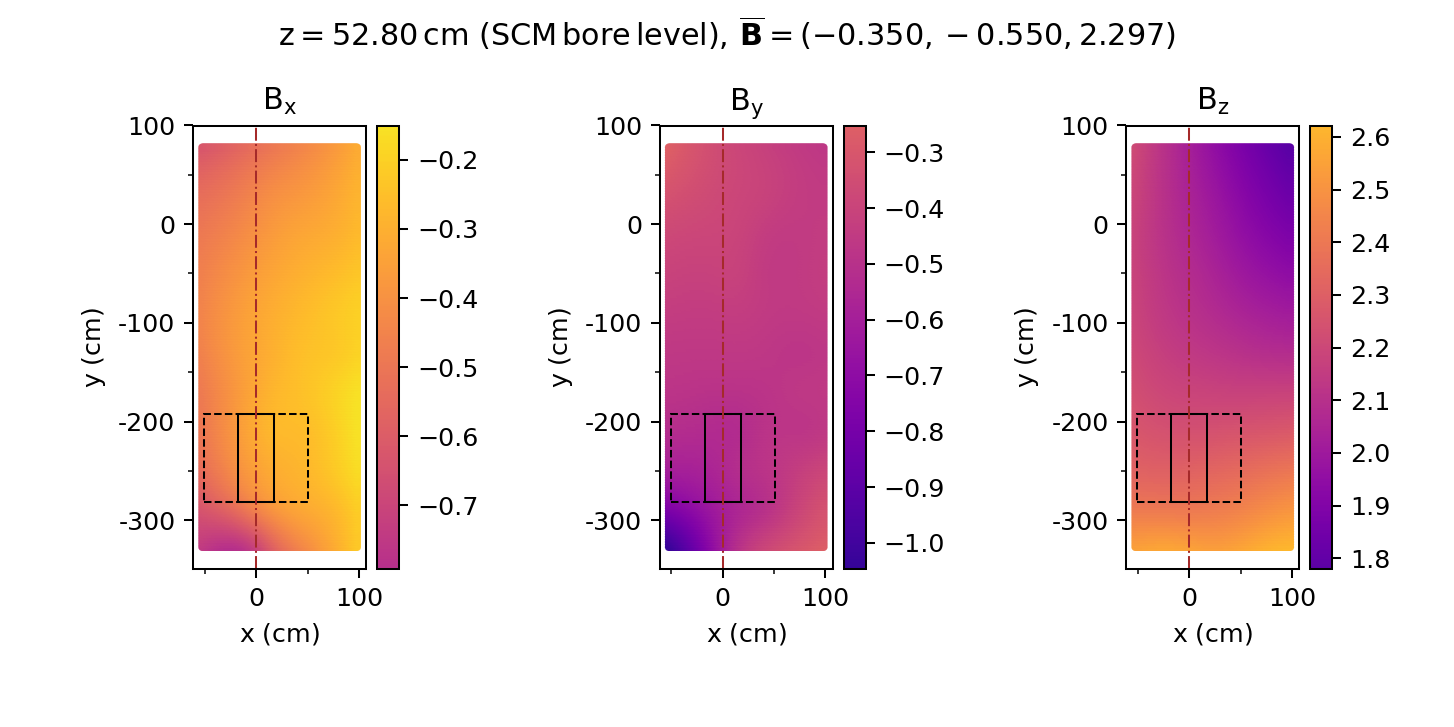

In [419]:
fig1 = plt.figure(facecolor='white', figsize=(8,4))
ax1 = fig1.add_subplot(131)
ax2 = fig1.add_subplot(132)
ax3 = fig1.add_subplot(133)


# ax1.tick_params(axis='x', rotation=-15, labelsize=10)
# ax1.tick_params(axis='y', rotation=-25, labelsize=10)
# ax1.tick_params(axis='y', rotation=-30, labelsize=11)
# ax1.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax1, ax2, ax3]:    
#     axi.set_xlim(x_min,x_max)
#     axi.set_ylim(y_min,80)    
#     axi.set_xlim(-64+10.25, 110.25)
    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.xaxis.set_ticks(np.arange(-100, 100, 50), minor=True)      
    axi.yaxis.set_ticks(np.arange(-300, 100, 50), minor=True)      

    axi.set_xlabel('$\mathsf{x}$ (cm)')
    axi.set_ylabel('$\mathsf{y}$ (cm)')
    


# sc1 = ax1.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)
sc1_int = ax1.scatter(x_dense[idx_plat], y_dense[idx_plat],  c=Bx_dense[idx_plat], marker='.', lw=.1, cmap=cm.plasma)
sc2_int = ax2.scatter(x_dense[idx_plat], y_dense[idx_plat], c=By_dense[idx_plat], marker='.', lw=.1, cmap=cm.plasma)
sc3_int = ax3.scatter(x_dense[idx_plat], y_dense[idx_plat],  c=Bz_dense[idx_plat], marker='.', lw=.1, cmap=cm.plasma)







import matplotlib.patches as patches

for axi in [ax1, ax2, ax3]:
    plate = patches.Rectangle((-101.5/2, -282),101.5, 90,linewidth=.8,ls='--', edgecolor='black',facecolor='none')
    SCM = patches.Rectangle((-35/2., -282),35, 90,linewidth=.8,ls='-', edgecolor='black',facecolor='none')
    axi.axvline(0, ls='-.', color='brown', lw=.8)

    axi.add_patch(plate)
    axi.add_patch(SCM)
    


cb1 = plt.colorbar(sc1_int, ax=ax1)
cb2 = plt.colorbar(sc2_int, ax=ax2)
cb3 = plt.colorbar(sc3_int, ax=ax3)


cb1.set_clim(Bx_min, Bx_max)
cb2.set_clim(By_min, By_max)
cb3.set_clim(Bz_min, Bz_max)




ax1.set_title('$\mathsf{B_x}$') 
ax2.set_title('$\mathsf{B_y}$')
ax3.set_title('$\mathsf{B_z}$')

#
fig1.suptitle('$\mathsf{z=%.2f\,cm\,\,(SCM\,bore\,level),\,\overline{\mathbf{B}}=(%.3f, %.3f, %.3f) }$'%(z_height, Bx_av, By_av, Bz_av))
# fig1.suptitle('$\mathsf{z=%.2f\,cm\,\,(UCN\,port\,level),\,\overline{\mathbf{B}}=(%.3f, %.3f, %.3f) }$'%(z_height, Bx_av, By_av, Bz_av))

fig1.tight_layout(pad=3,rect=[0, 0, 1, 0.99])
# fig1.savefig('fall_run_UCNport')
# fig1.savefig('fall_run_SCM')

# fig1.savefig('fall_run_UCNport_color_rescaled')
fig1.savefig('fall_run_SCM_color_rescaled')



##### x = 0 


In [323]:
x_cut = 0.0
# z_height = 52.8

df_x0 = df_grid[df_grid.x==x_cut]


z_min, z_max= np.min(df_x0.z), np.max(df_x0.z)
y_min, y_max= np.min(df_x0.y), np.max(df_x0.y)

print x_max
print x_min

NL = 200 # default os 50
z_dense_grid = np.sort(np.append(np.linspace(z_min, z_max, NL), np.array([52.8, 136.5])))
z_dense, y_dense = np.meshgrid(z_dense_grid, np.linspace(y_min,y_max, NL))


import scipy.interpolate as interp
# Bx_rbf = interp.Rbf(df_x0.z, df_x0.y, df_x0.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bx_rbf = interp.Rbf(df_x0.z, df_x0.y, df_x0.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation

Bx_dense = Bx_rbf(z_dense, y_dense)  # not really a function, but a callable class instance


Bz_rbf = interp.Rbf(df_x0.z, df_x0.y, df_x0.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bz_dense = Bz_rbf(z_dense, y_dense)  # not really a function, but a callable class instance

By_rbf = interp.Rbf(df_x0.z, df_x0.y, df_x0.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
By_dense = By_rbf(z_dense, y_dense)  # not really a function, but a callable class instance

# fig1 = plt.figure(facecolor='white', figsize=(10,5))
print Bz_dense
idx_plat = np.where((y_dense < 80))
idx_SCM = np.where((z_dense < 52.8 + 35/2.) & (z_dense > 52.8-35/2.) & (y_dense < -192)& (y_dense > -282))
idx_z_SCM = np.where(z_dense==52.8)
idx_z_UCN = np.where(z_dense==136.5)

print idx_z_UCN
Bx_av, By_av, Bz_av = np.average(Bx_dense[idx_SCM]), np.average(By_dense[idx_SCM]), np.average(Bz_dense[idx_SCM])
print Bx_av, By_av, Bz_av

98.2
-141.8
[[2.33915288 2.34438054 2.34958644 ... 2.65374087 2.65226007 2.65075006]
 [2.33259304 2.33773689 2.34286045 ... 2.65029534 2.64888253 2.64744103]
 [2.32579385 2.3308548  2.33589734 ... 2.64663444 2.64528808 2.64391371]
 ...
 [1.80837608 1.81078071 1.81313714 ... 1.96990753 1.96867163 1.96739438]
 [1.80009595 1.80253693 1.80492706 ... 1.96017735 1.95889356 1.95756715]
 [1.79127836 1.79375845 1.79618576 ... 1.9499651  1.94863227 1.9472558 ]]
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  9

<IPython.core.display.Javascript object>


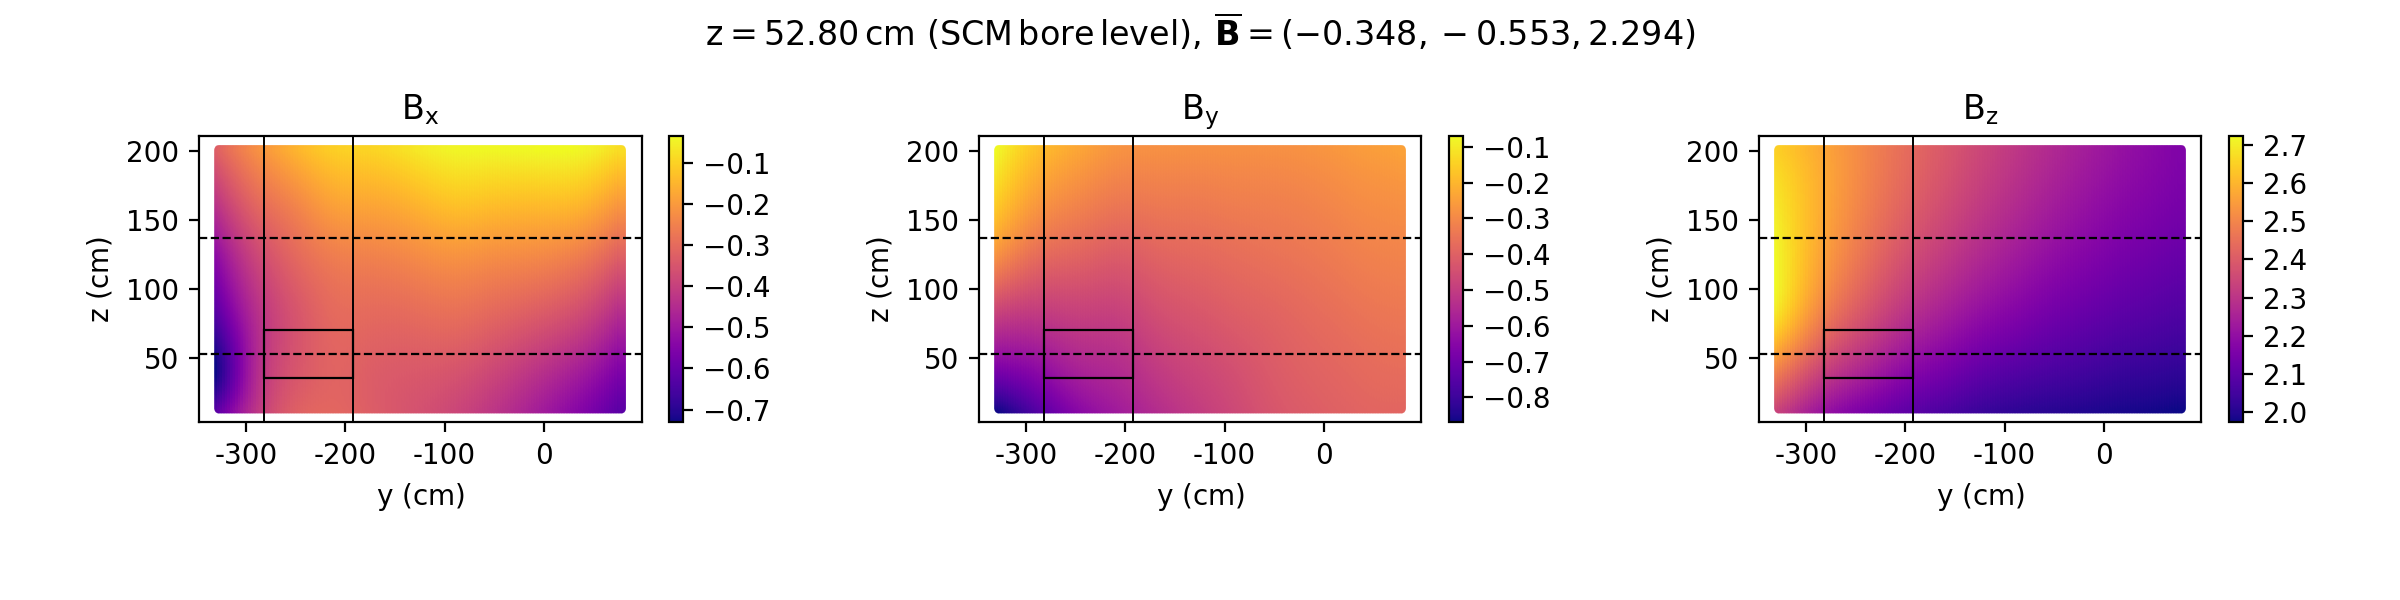

In [321]:
fig11 = plt.figure(facecolor='white', figsize=(12,3))
ax11 = fig11.add_subplot(131)
ax12 = fig11.add_subplot(132)
ax13 = fig11.add_subplot(133)


# ax1.tick_params(axis='x', rotation=-15, labelsize=10)
# ax1.tick_params(axis='y', rotation=-25, labelsize=10)
# ax1.tick_params(axis='y', rotation=-30, labelsize=11)
# ax1.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax11, ax12, ax13]:    
#     axi.set_xlim(x_min,x_max)
#     axi.set_ylim(y_min,80)    
#     axi.set_xlim(-64+10.25, 110.25)
    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#     axi.xaxis.set_ticks(np.arange(-100, 100, 50), minor=True)      
#     axi.yaxis.set_ticks(np.arange(-300, 100, 50), minor=True)      

    axi.set_xlabel('$\mathsf{y}$ (cm)')
    axi.set_ylabel('$\mathsf{z}$ (cm)')
    


# sc1 = ax1.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)
sc1_int = ax11.scatter(y_dense[idx_plat], z_dense[idx_plat],  c=Bx_dense[idx_plat], marker='.', lw=.1, cmap=cm.plasma)
sc2_int = ax12.scatter(y_dense[idx_plat], z_dense[idx_plat], c=By_dense[idx_plat], marker='.', lw=.1, cmap=cm.plasma)
sc3_int = ax13.scatter(y_dense[idx_plat], z_dense[idx_plat],  c=Bz_dense[idx_plat], marker='.', lw=.1, cmap=cm.plasma)







# import matplotlib.patches as patches

for axi in [ax11, ax12, ax13]:
#     plate = patches.Rectangle((-101.5/2, -282),101.5, 90,linewidth=.8,ls='--', edgecolor='black',facecolor='none')
    SCM = patches.Rectangle((-282, -35/2.+52.8 ),90,35,linewidth=.8,ls='-', edgecolor='black',facecolor='none')
    axi.axhline(52.8, ls='--', color='black', lw=.8)
    axi.axhline(136.5, ls='--', color='black', lw=.8)
    axi.axvline(-282, ls='-', color='black', lw=.7)
    axi.axvline(-192, ls='-', color='black', lw=.7)

#     axi.add_patch(plate)
    axi.add_patch(SCM)
    


cb11 = plt.colorbar(sc1_int, ax=ax11)
cb12 = plt.colorbar(sc2_int, ax=ax12)
cb13 = plt.colorbar(sc3_int, ax=ax13)







ax11.set_title('$\mathsf{B_x}$') 
ax12.set_title('$\mathsf{B_y}$')
ax13.set_title('$\mathsf{B_z}$')

# fig1.suptitle('$\mathsf{z=%.2f\,cm\,\,(UCN\,port\,level)}$'%(z_height))
fig11.suptitle('$\mathsf{z=%.2f\,cm\,\,(SCM\,bore\,level),\,\overline{\mathbf{B}}=(%.3f, %.3f, %.3f) }$'%(z_height, Bx_av, By_av, Bz_av))
# fig1.suptitle('$\mathsf{z=%.2f\,cm\,\,(UCN\,port\,level),\,\overline{\mathbf{B}}=(%.3f, %.3f, %.3f) }$'%(z_height, Bx_av, By_av, Bz_av))

fig11.tight_layout(pad=3,rect=[0, 0, 1, 0.99])

fig11.savefig('fall_run_x0')


<IPython.core.display.Javascript object>


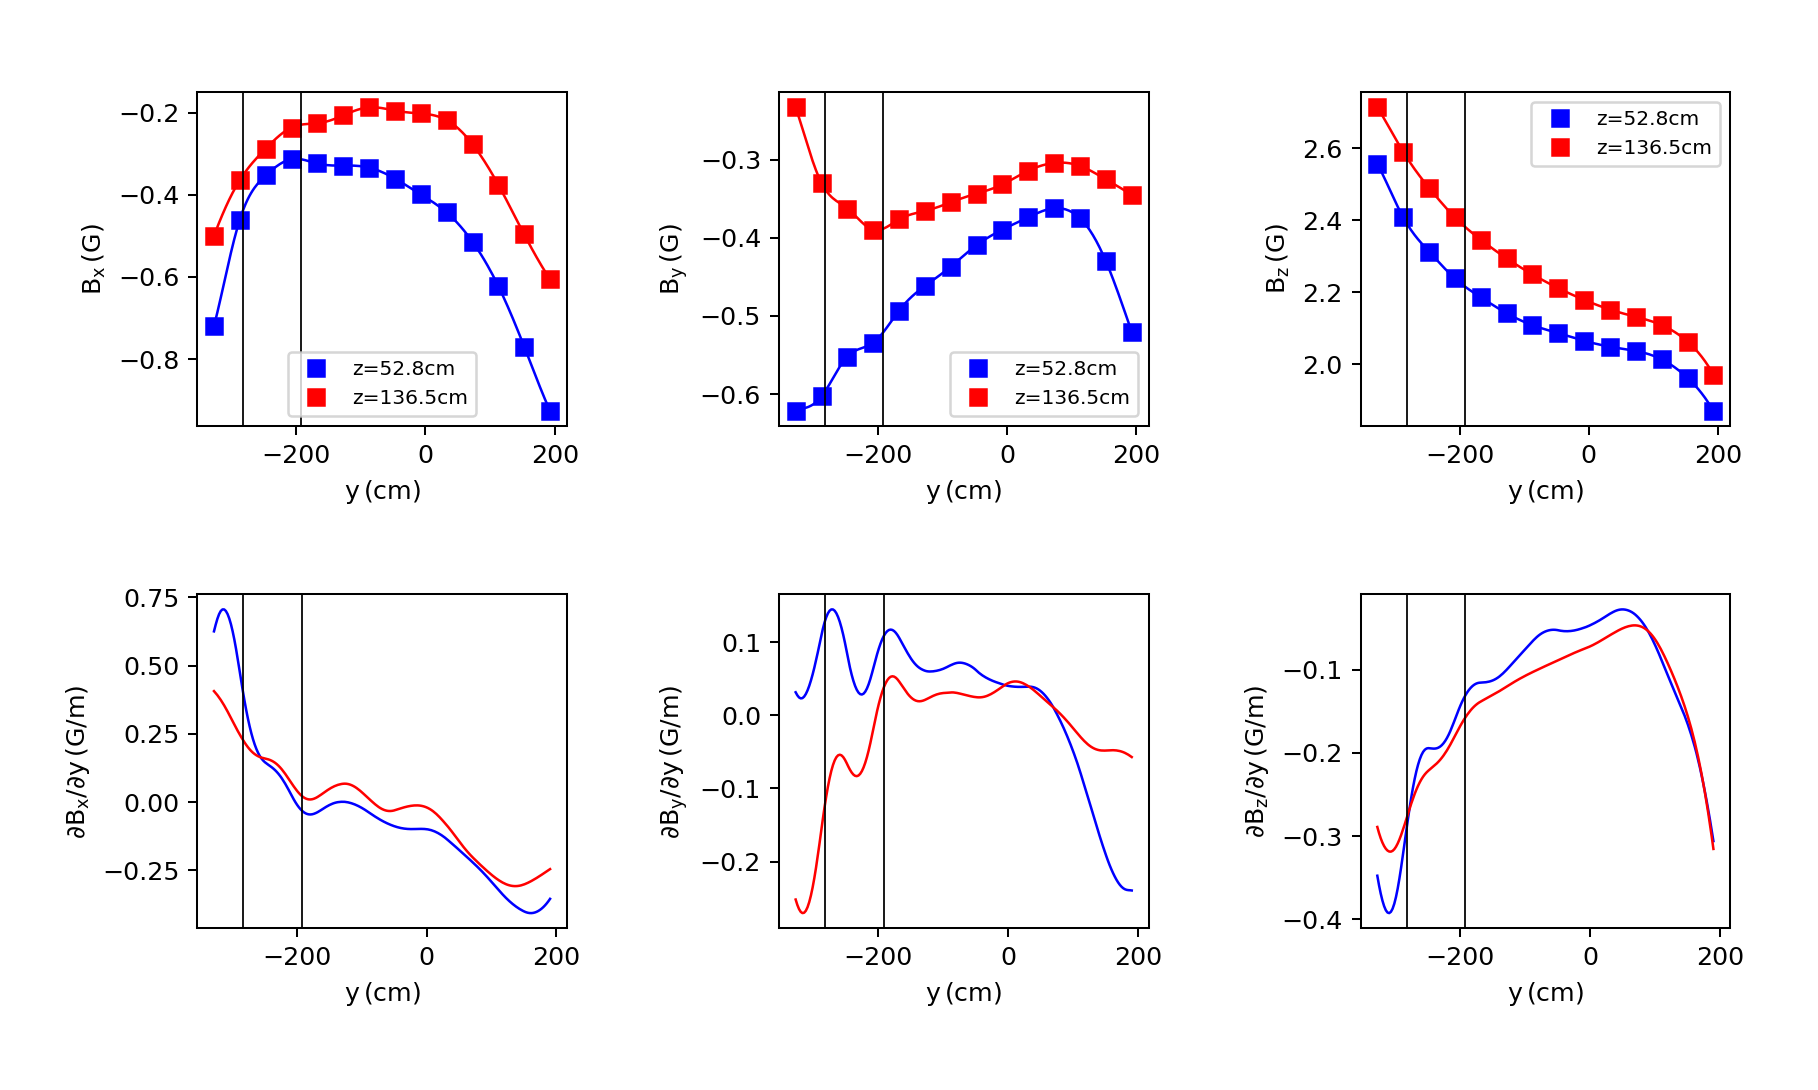

In [405]:
fig2, ax2 = plt.subplots(2,3, figsize=(10,6))

ax2[0,0].plot(y_dense[idx_z_SCM], Bx_dense[idx_z_SCM],  '-', lw=1,c='b', label=None)
ax2[0,0].plot(df_grid[(df_grid.z ==52.8)&(df_grid.x ==0.)].y, 
              df_grid[(df_grid.z ==52.8)&(df_grid.x ==0.)].B_x,  's', c='b', label='z=52.8cm')# ax2[0,0].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
ax2[1,0].plot(y_dense[idx_z_SCM][:-1],1e2*np.diff(Bx_dense[idx_z_SCM])/np.diff(y_dense[idx_z_SCM]), lw=1, c='b' )

ax2[0,1].plot(y_dense[idx_z_SCM], By_dense[idx_z_SCM],  '-', lw=1,c='b', label=None)
ax2[0,1].plot(df_grid[(df_grid.z ==52.8)&(df_grid.x ==0.)].y, 
              df_grid[(df_grid.z ==52.8)&(df_grid.x ==0.)].B_y,  's', c='b', label='z=52.8cm')# ax2[0,0].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
ax2[1,1].plot(y_dense[idx_z_SCM][:-1],1e2*np.diff(By_dense[idx_z_SCM])/np.diff(y_dense[idx_z_SCM]), lw=1, c='b' )

ax2[0,2].plot(y_dense[idx_z_SCM], Bz_dense[idx_z_SCM],  '-', lw=1,c='b', label=None)
ax2[0,2].plot(df_grid[(df_grid.z ==52.8)&(df_grid.x ==0.)].y, 
              df_grid[(df_grid.z ==52.8)&(df_grid.x ==0.)].B_z,  's', c='b', label='z=52.8cm')# ax2[0,0].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
ax2[1,2].plot(y_dense[idx_z_SCM][:-1],1e2*np.diff(Bz_dense[idx_z_SCM])/np.diff(y_dense[idx_z_SCM]), lw=1, c='b' )

ax2[0,0].plot(y_dense[idx_z_UCN], Bx_dense[idx_z_UCN],  '-', lw=1,c='r', label=None)
ax2[0,0].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
              df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].B_x,  's', c='r', label='z=136.5cm')# ax2[0,0].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
ax2[1,0].plot(y_dense[idx_z_UCN][:-1],1e2*np.diff(Bx_dense[idx_z_UCN])/np.diff(y_dense[idx_z_UCN]), lw=1, c='r' )

ax2[0,1].plot(y_dense[idx_z_UCN], By_dense[idx_z_UCN],  '-', lw=1,c='r', label=None)
ax2[0,1].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
              df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].B_y,  's', c='r', label='z=136.5cm')# ax2[0,0].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
ax2[1,1].plot(y_dense[idx_z_UCN][:-1],1e2*np.diff(By_dense[idx_z_UCN])/np.diff(y_dense[idx_z_UCN]), lw=1, c='r' )

ax2[0,2].plot(y_dense[idx_z_UCN], Bz_dense[idx_z_UCN],  '-', lw=1,c='r', label=None)
ax2[0,2].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
              df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].B_z,  's', c='r',label='z=136.5cm')# ax2[0,0].plot(df_grid[(df_grid.z ==136.5)&(df_grid.x ==0.)].y, 
ax2[1,2].plot(y_dense[idx_z_UCN][:-1],1e2*np.diff(Bz_dense[idx_z_UCN])/np.diff(y_dense[idx_z_UCN]), lw=1, c='r' )

for i in range(2):
    for j in range(3):
        ax2[0,j].legend(fontsize=8)
        ax2[i,j].axvline(-282, ls='-', color='black', lw=.7)
        ax2[i,j].axvline(-192, ls='-', color='black', lw=.7)
        ax2[i,j].set_xlabel('$\mathsf{y\,(cm)}$')

ax2[0,0].set_ylabel('$\mathsf{B_x\,(G)}$')
ax2[0,1].set_ylabel('$\mathsf{B_y\,(G)}$')
ax2[0,2].set_ylabel('$\mathsf{B_z\,(G)}$')

ax2[1,0].set_ylabel('$\mathsf{\partial B_x/ \partial y \,(G/m)}$')
ax2[1,1].set_ylabel('$\mathsf{\partial B_y/ \partial y \,(G/m)}$')
ax2[1,2].set_ylabel('$\mathsf{\partial B_z/ \partial y \,(G/m)}$')

fig2.tight_layout(pad=3,rect=[0, 0,1 , 0.99])

fig2.savefig('fall_gradient')



In [406]:
np.diff(y_dense[idx_z_UCN])

array([2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306533,
       2.61306533, 2.61306533, 2.61306533, 2.61306533, 2.61306